# TechnoHacks Edutech Internship Task-2

# Task : Diabetes Prediction

# About the Dataset

This dataset is originally from the **National Institute of Diabetes and Digestive and Kidney Diseases**. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are **females at least 21 years old of Pima Indian heritage**.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Dataset Link : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

# Problem Statement
We have to diagnostically predict whether or not a patient has diabetes based on certain diagnostic measurements included in the dataset.

# Importing Libraries

In [464]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Loading the Dataset

In [465]:
diabetes = pd.read_csv('diabetes.csv')
diabetes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [466]:
# showing first 5 rows
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [467]:
# showing last 5 rows
diabetes.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

# Basic Understanding of the Dataset

In [468]:
# Showing dimensions of the dataset
diabetes.shape

(768, 9)

### From the above output we can see that the dataset has 768 rows and 9 columns.

In [469]:
# showing column names
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Information about the columns
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

In Outcome column 0 represents non-diabetic and 1 represents diabetic.

In [470]:
# checking for data types
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [471]:
# showing information about the dataset
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From the above information we can conclude that

1. The dataset has 768 rows and 9 columns.
2. The dataset has no null values.
3. All the columns of the dataset are of numerical type.

# Data Cleaning and Preprocessing

## Handling Duplicates

In [472]:
# checking for duplicated values
diabetes.duplicated().sum()

0

No duplicate values found.


## Handling Missing Values

In [473]:
# checking for missing values
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No null values found.

# Descriptive Statistical Analysis

In [474]:
diabetes.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

# Outliers Detection

## Checking for No. of Outliers in each column

In [475]:
# Checking for outliers using IQR method
Q1 = diabetes.quantile(0.25)
Q3 = diabetes.quantile(0.75)
IQR = Q3 - Q1
print('Outliers count of each column')
outliers = ((diabetes < (Q1 - 1.5 * IQR)) | (diabetes > (Q3 + 1.5 * IQR))).sum()
print(outliers)

Outliers count of each column
Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


## Removing Outliers

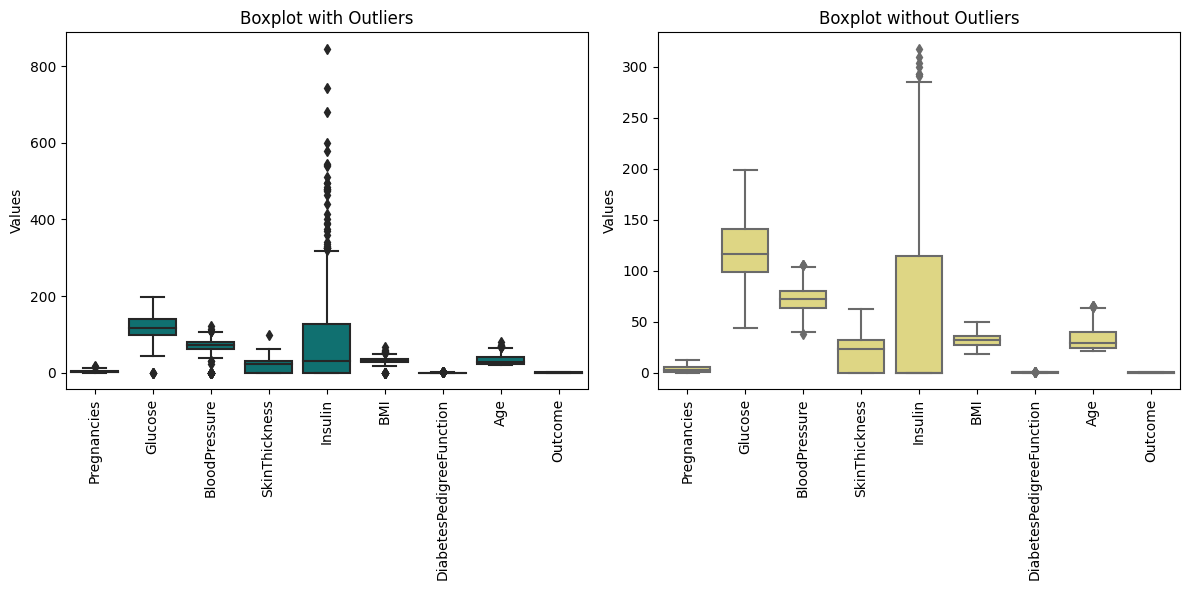

In [476]:
# Calculate Q1, Q3, and IQR for each column in the diabetes dataset
Q1 = diabetes.quantile(0.25)
Q3 = diabetes.quantile(0.75)
IQR = Q3 - Q1

# Find outliers in each column
outliers_mask = ((diabetes < (Q1 - 1.5 * IQR)) | (diabetes > (Q3 + 1.5 * IQR)))

# Create a DataFrame to store the outliers information
outliers_df = pd.DataFrame(outliers_mask, columns=diabetes.columns)

# Remove outliers from each column
diabetes_no_outliers = diabetes[~outliers_mask]

# Plot boxplots for both datasets (with and without outliers) side by side using seaborn
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=diabetes, color="#008080")
plt.title("Boxplot with Outliers")
plt.ylabel("Values")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=diabetes_no_outliers, color="#EDE275")
plt.title("Boxplot without Outliers")
plt.ylabel("Values")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Outliers Removed

# Data Visualization

## Plotting Histplot

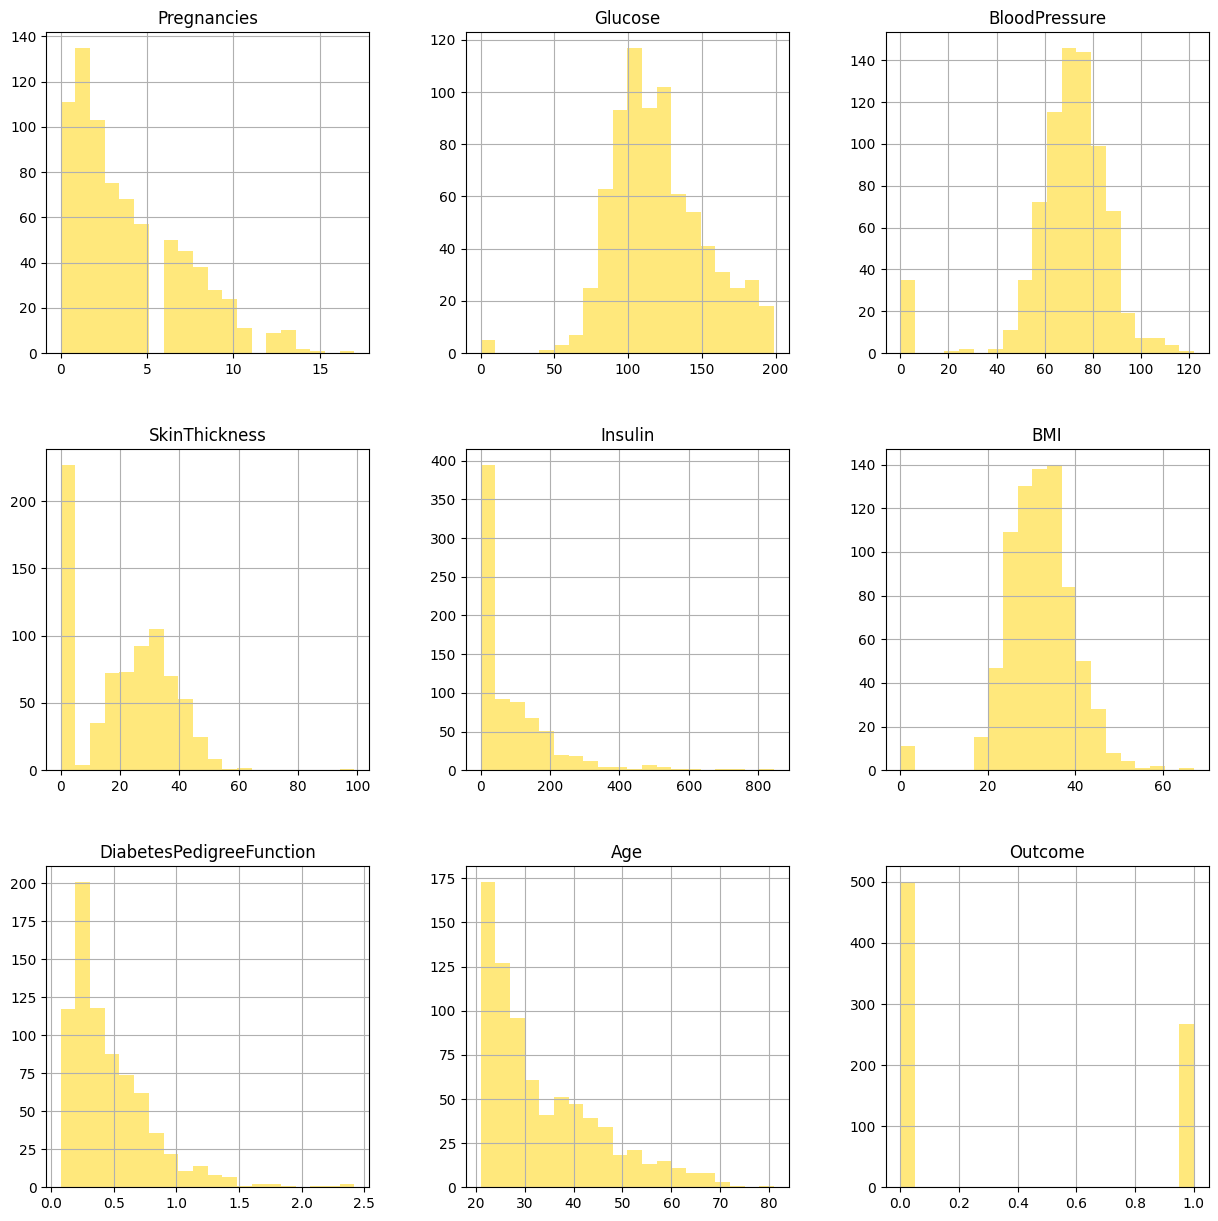

In [477]:
diabetes.hist(bins=20, figsize=(15, 15), color='#FFE87C')
plt.show()

## Pregnancies Column

## Preganancies Distribution

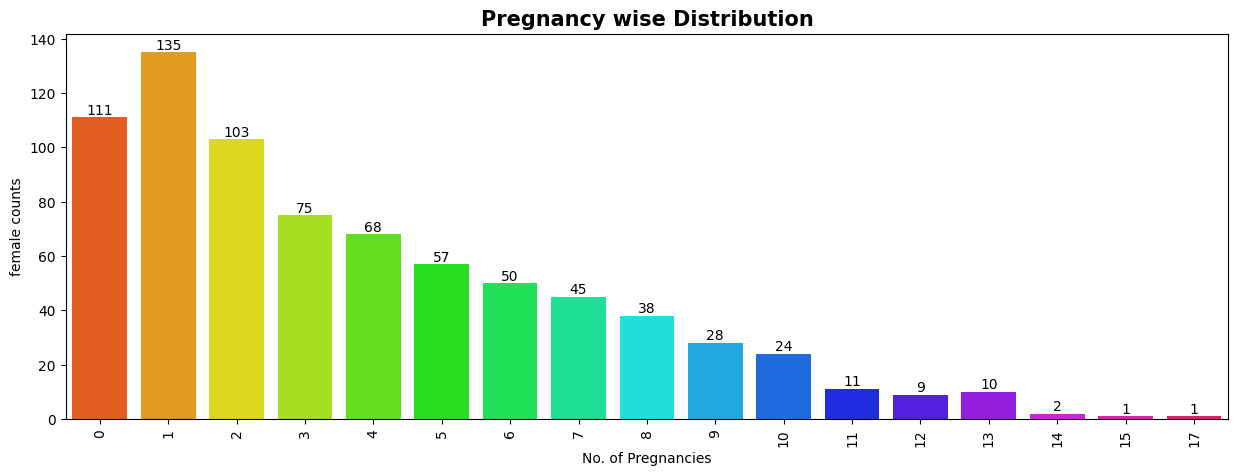

In [478]:
plt.figure(figsize=(15,5))
counts = diabetes["Pregnancies"].value_counts().sort_values(ascending=False)
ax = sns.barplot(x=counts.index, y=counts.values,palette="hsv")
ax.bar_label(ax.containers[0], )
plt.xlabel("No. of Pregnancies")
plt.ylabel("female counts")
plt.title("Pregnancy wise Distribution",fontweight="black", fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Observation :

1. Most of the females are having 1 pregnancies.
2. There are many females having 0 pregnancies.
3. The female count is decreasing as the number of pregnancies increases.

## Pregnant females distribution diabetes wise

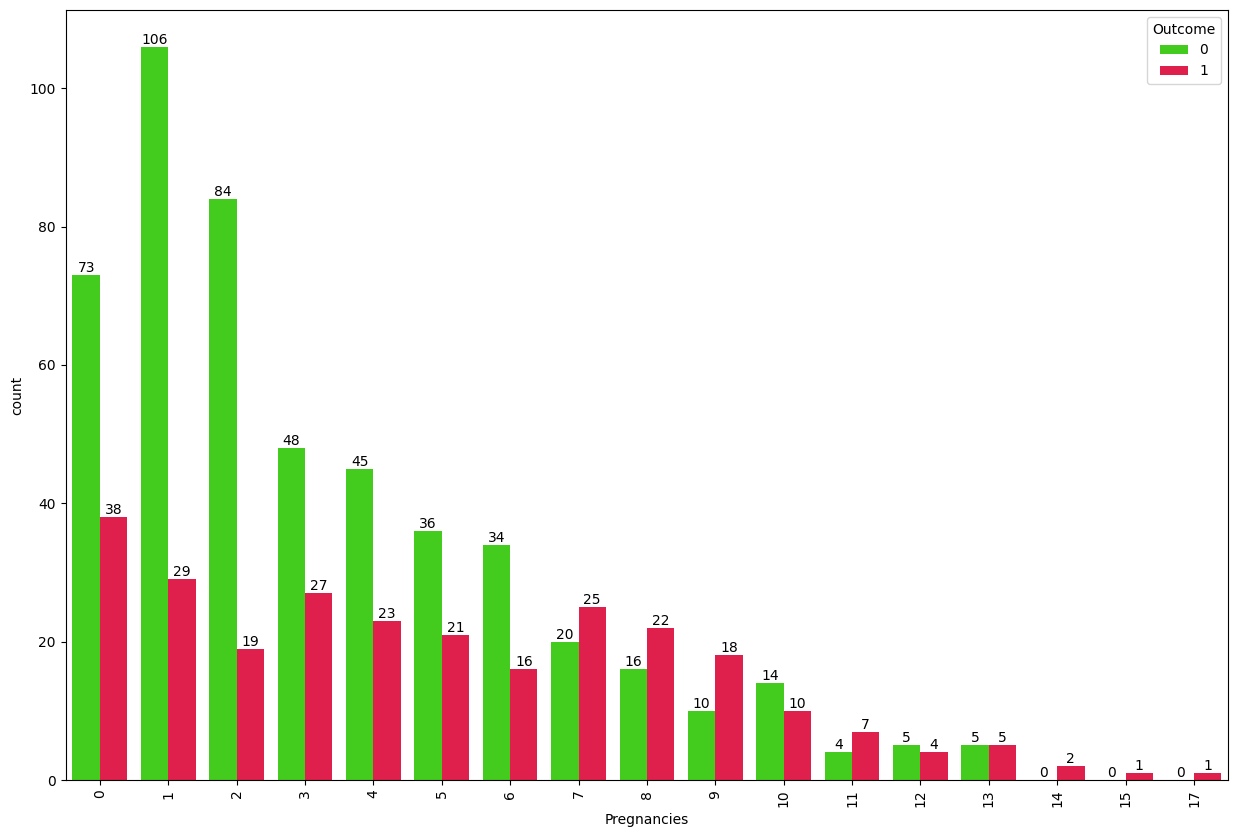

In [479]:
from pandas._libs.tslibs.offsets import prefix_mapping
plt.figure(figsize=(15,10))
preg_count = sns.countplot(x='Pregnancies', data=diabetes, palette="prism",hue='Outcome')
# Display labels on the bars
for container in preg_count.containers:
    preg_count.bar_label(container)
plt.xticks(rotation=90)
plt.show()

### Observation:

1. Most of the females are non-diabetic.
2. The females are having less number of pregnancies are more non-diabetic , for example pregnancies range from 0 to 6.
3. The females are having more number of pregnancies are more diabetic , for example pregnancies range from 7, 8, 9, 11, 14, 15, 17.

## Age Column

## Age Distribution

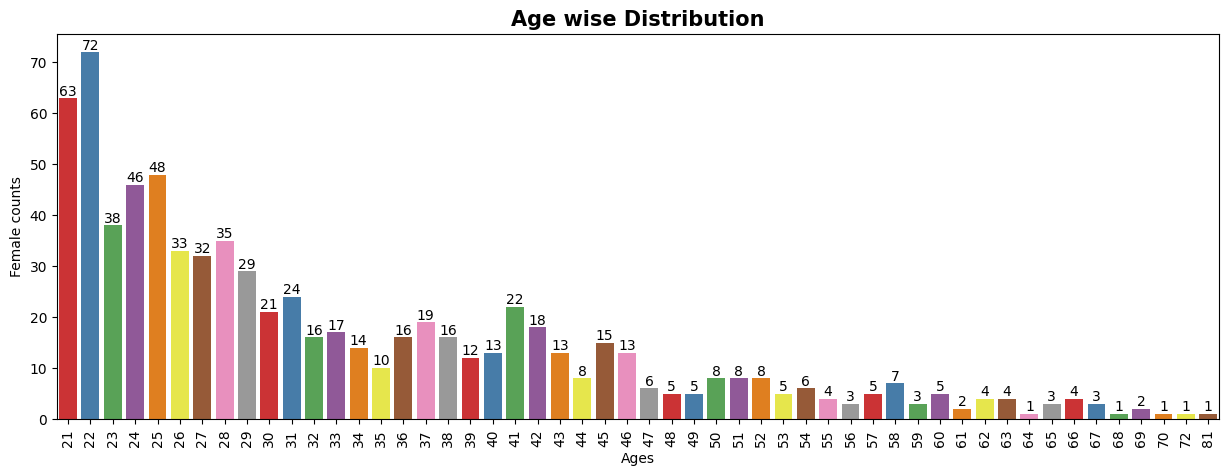

In [480]:
plt.figure(figsize=(15,5))
counts = diabetes["Age"].value_counts().sort_values(ascending=False)
ax = sns.barplot(x=counts.index, y=counts.values,palette="Set1")
ax.bar_label(ax.containers[0], )
plt.xlabel("Ages")
plt.ylabel("Female counts")
plt.title("Age wise Distribution",fontweight="black", fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Observation:

1. Most of the female ranges between 20 to 30 years old.
2. There are very few no. of femaleshaving high age category.

## Age Distribution Diabetes Wise using Density Plot.

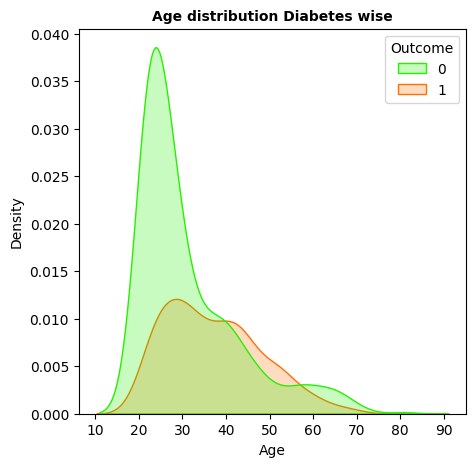

In [481]:
plt.figure(figsize=(5,5))
sns.kdeplot(x=diabetes["Age"],hue=diabetes["Outcome"],shade=True,palette="gist_ncar")
plt.title("Age distribution Diabetes wise",fontweight="black", fontsize=10)
plt.show()

### Observation:

1. Patients with no diabetes are having high density.
2. Patients with diabetes are having low density.
3. Most of the Non Diabetic Patients ranges between 20 - 35 years old.
4. Most of the Diabetic Patients ranges between 25 - 45 years old.

# The Relation Between Age and Other Features.

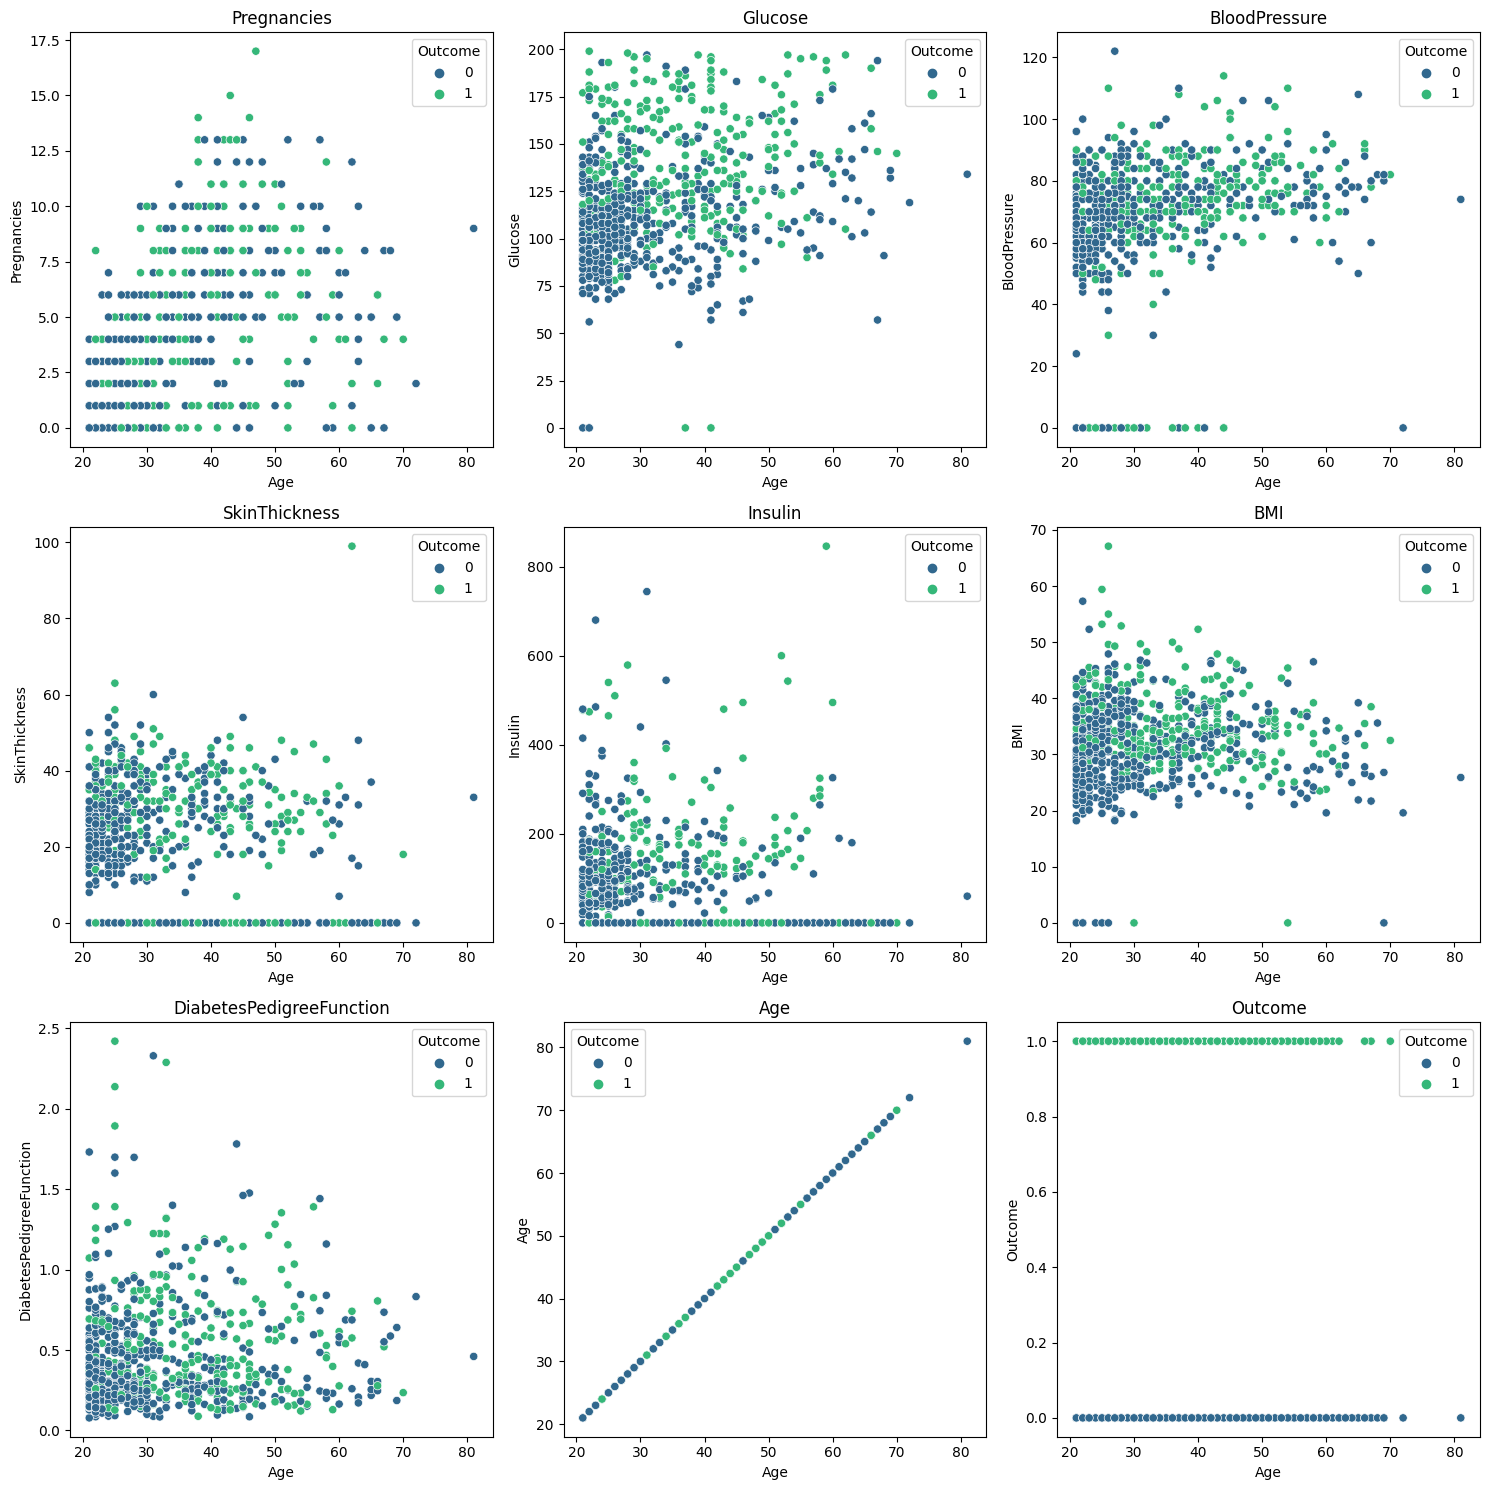

In [482]:
fig = plt.figure(figsize=(15,15))
for index,column in enumerate(list(diabetes.columns[0:10])):
    plt.subplot(3,3,index+1)
    sns.scatterplot(y = diabetes.loc[:, column], x = diabetes["Age"], hue=diabetes["Outcome"],palette='viridis')
    plt.title(column, size = 12)
fig.tight_layout()

# Changes in some features over Age

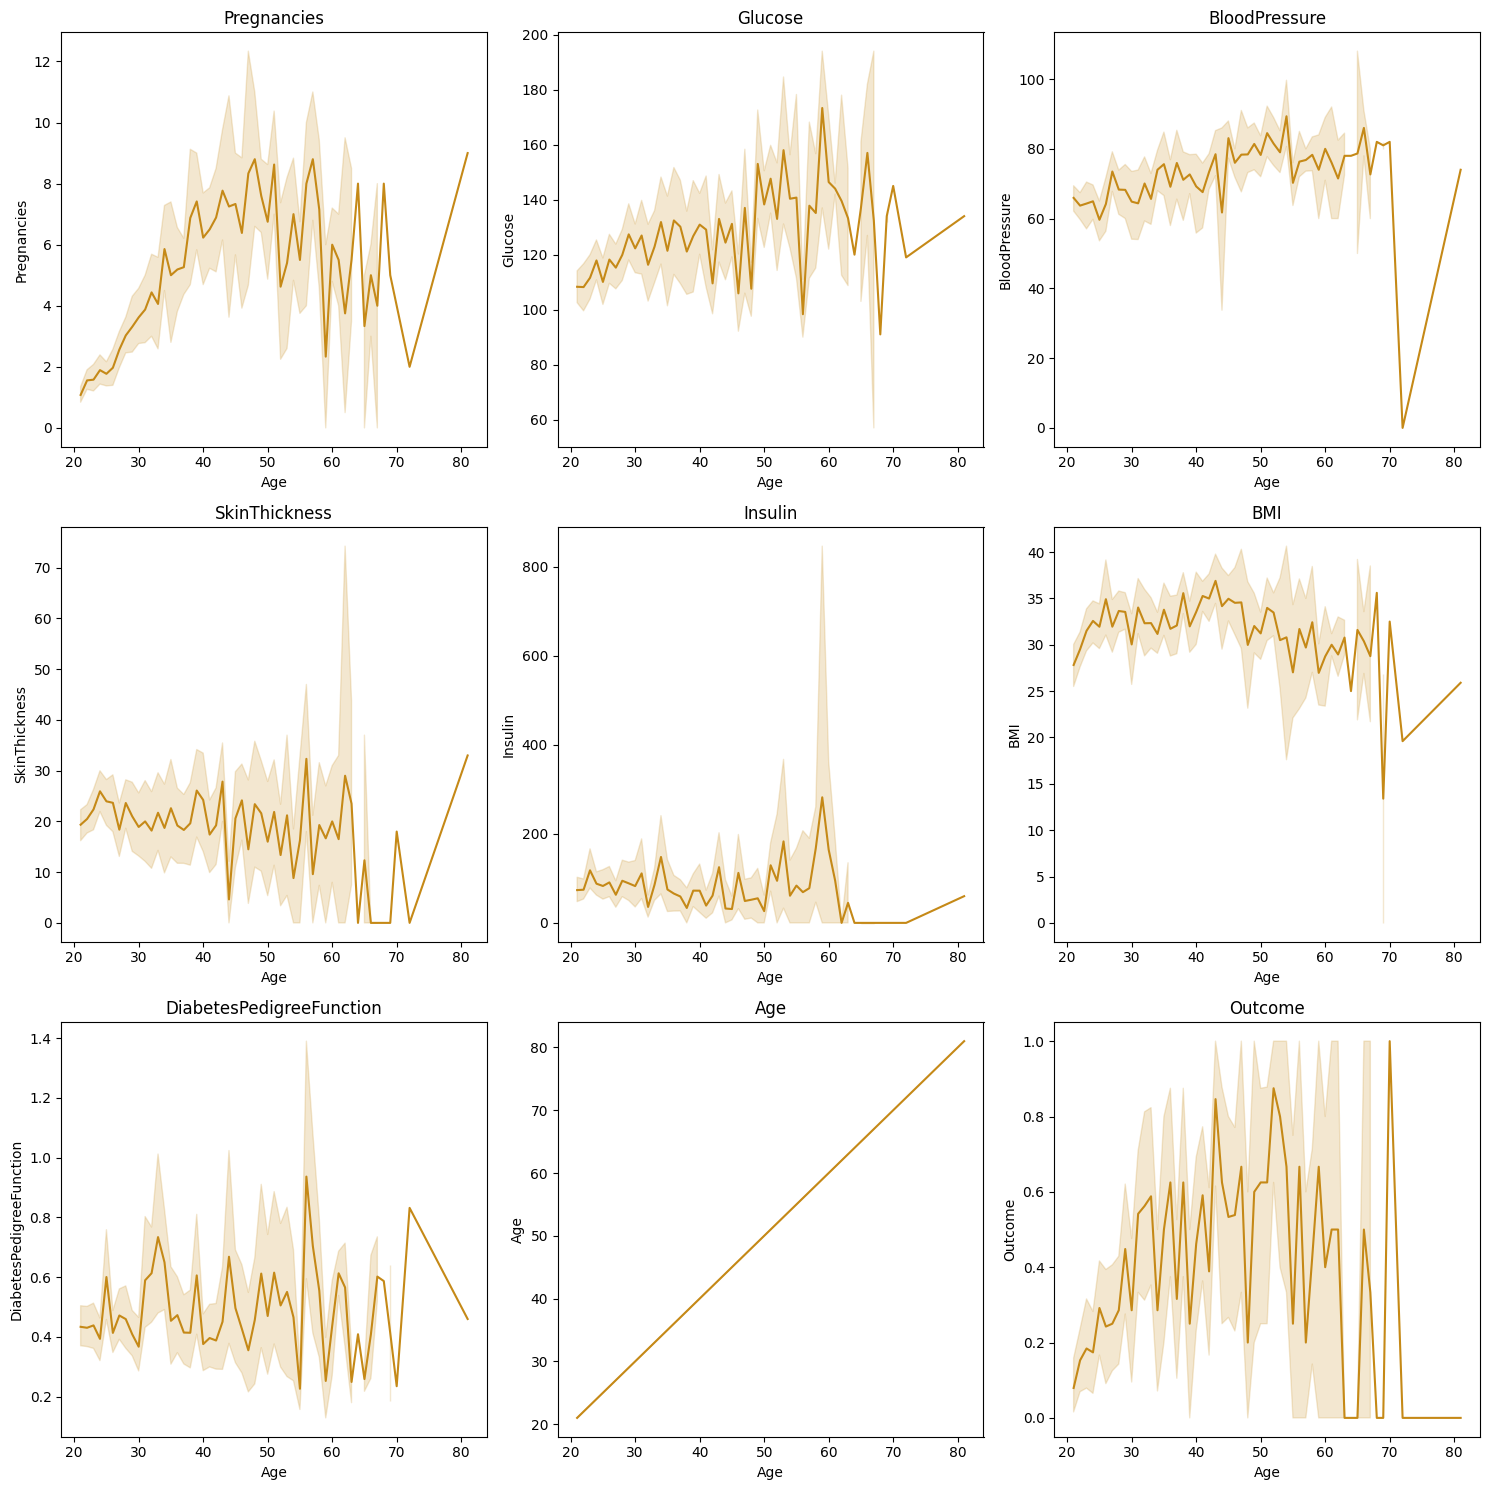

In [483]:
fig = plt.figure(figsize=(15,15))
for index,column in enumerate(list(diabetes.columns[0:10])):
    plt.subplot(3,3,index+1)
    sns.lineplot(y = diabetes.loc[:, column], x = diabetes["Age"],color='#C58917')
    plt.title(column, size = 12)
fig.tight_layout()

# Plotting Target Variable (Outcome)

In [484]:
print(diabetes['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


## CountPlot for Outcome

In [485]:
data = {'Outcome': [500, 268]}

# Create the bar plot using Plotly
fig = go.Figure(data=go.Bar(x=["Does not have Diabetes", "Does have diabetes"], y=data['Outcome'],
                            marker=dict(color=["#AF9B60", "#954535"])))

# Update layout to add title and labels
fig.update_layout(title='Count of patients with and without Diabetes',
                  xaxis_title='Diabetes',
                  yaxis_title='Count',
                  width=600, height=400)

# Show the plot
fig.show()


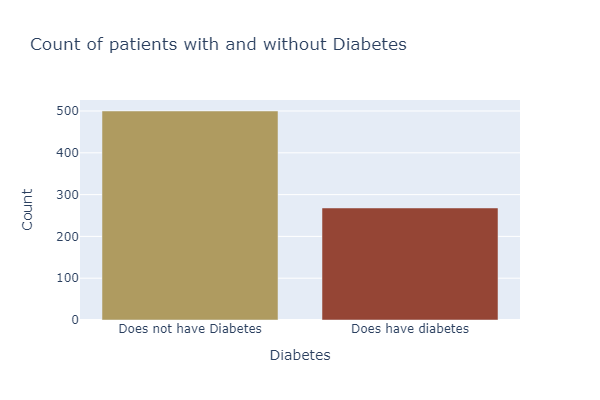

## Percentage Distribution of Outcome

In [486]:
condition = ["Does not have Diabetes","Does have diabetes"]

have_or_not = diabetes["Outcome"].value_counts().tolist()
values = [have_or_not[0], have_or_not[1]]

fig = px.pie(values = diabetes["Outcome"].value_counts(), names = condition, width = 800, height = 400, color_discrete_sequence=["#AF9B60", "#954535"], title="Percentage whether patient has diabetes or not")
fig.show()

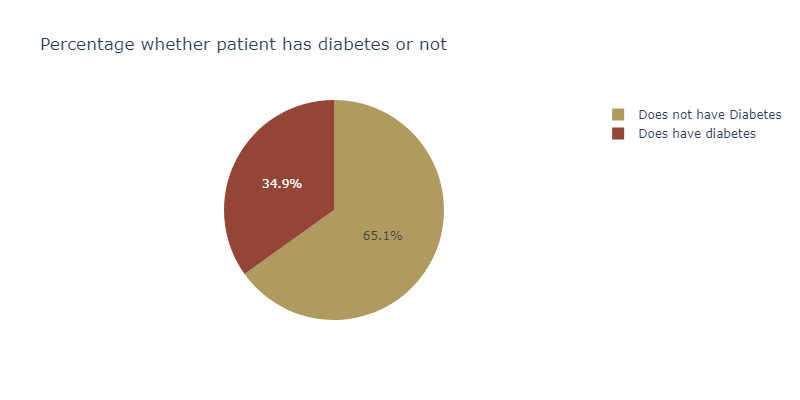

# Plotting Correlation plot

In [487]:
# checking for correlation
diabetes.corr().T

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [488]:
# Calculate the correlation matrix
correlation_matrix = diabetes.corr()

# Get the column names (features) for the heatmap
features = diabetes.columns

# Create the correlation heatmap using Plotly
fig = go.Figure(data=go.Heatmap(z=correlation_matrix.values,
                                x=features,
                                y=features,
                                colorscale='electric_r'))


# Update layout to add title
fig.update_layout(title='Correlation Heatmap')

# Show the plot
fig.show()

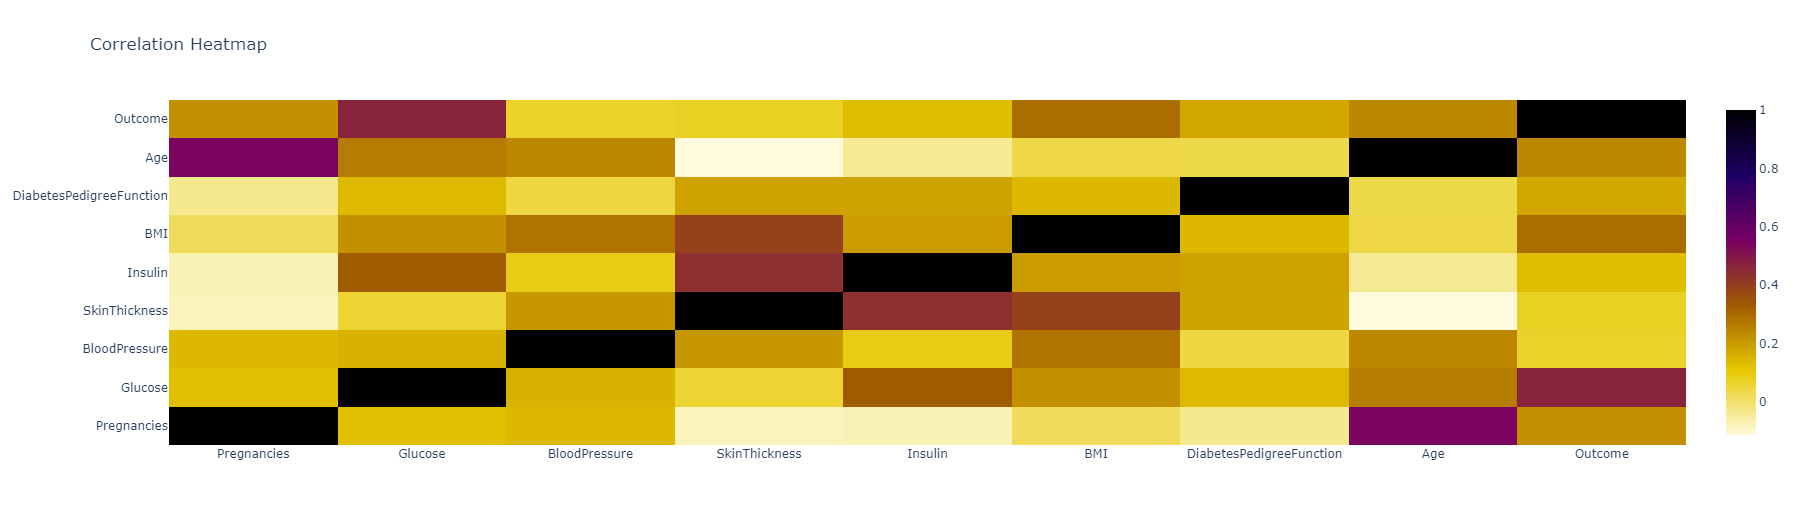

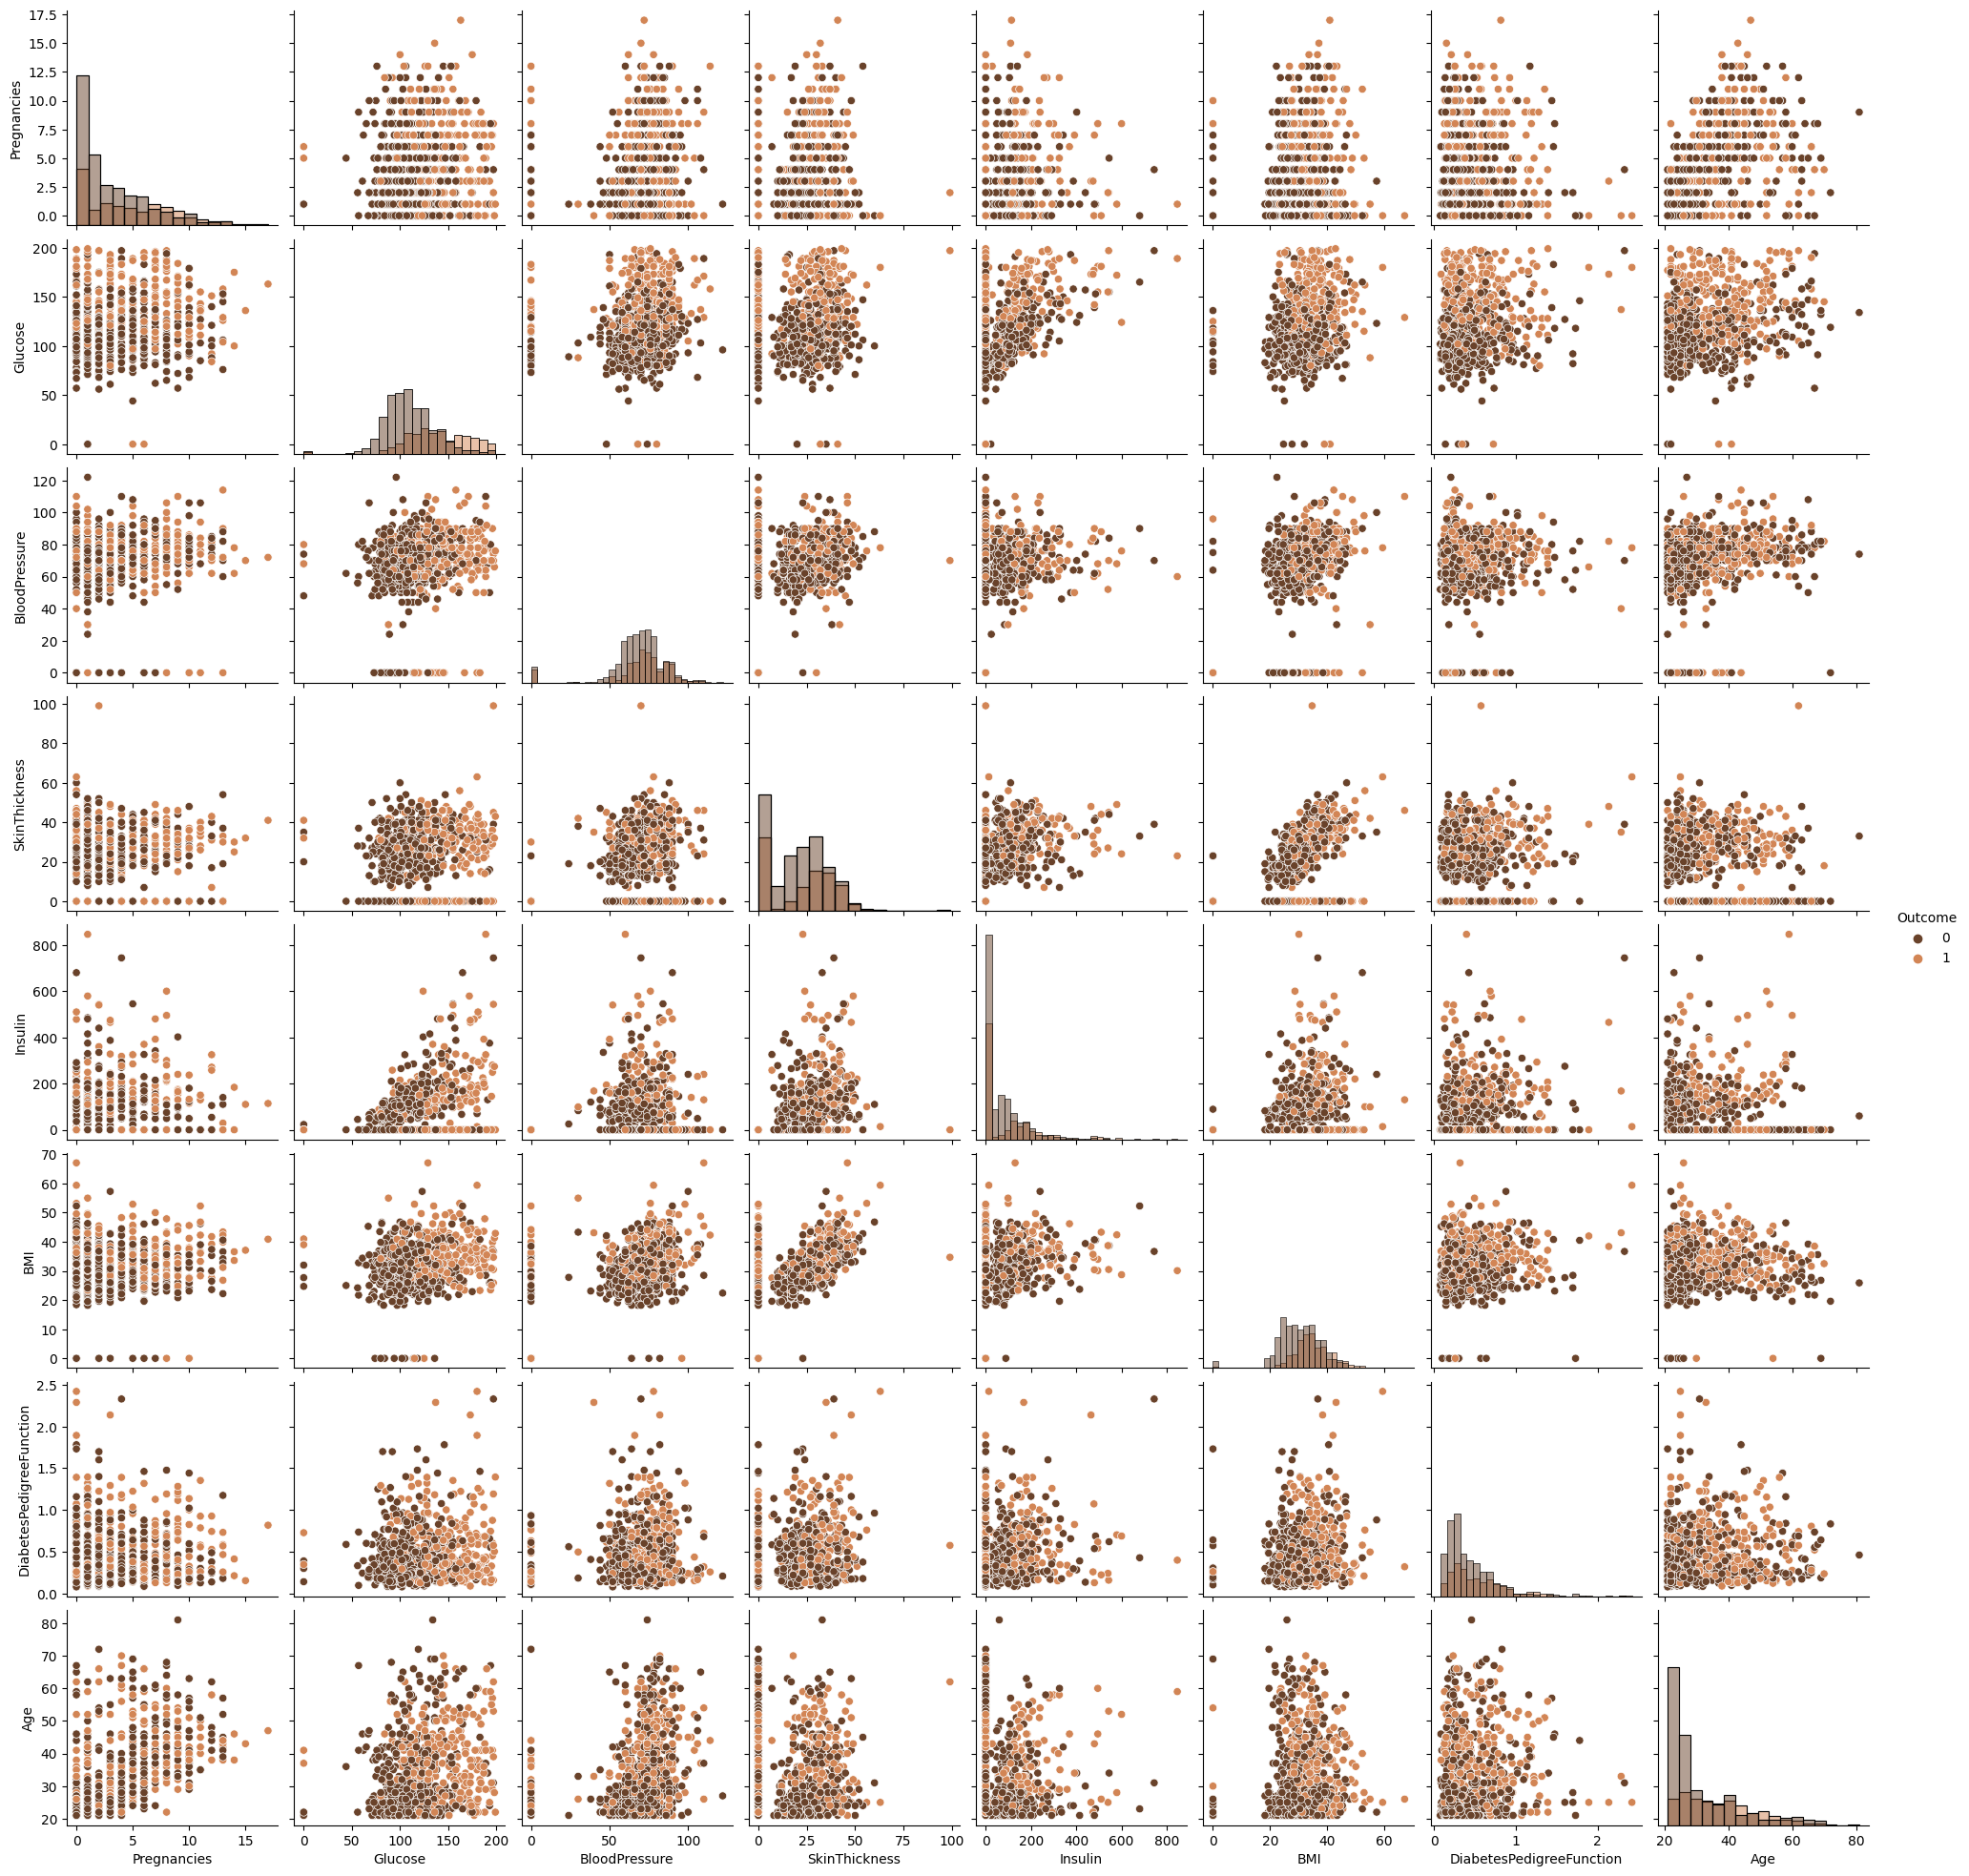

In [489]:
# plotting pairplot
sns.pairplot(diabetes, hue='Outcome', diag_kind='hist',palette='copper')
plt.show()

# Selecting the Dependent and Independent Features

In [490]:
x = diabetes.drop('Outcome',axis=1) # x denotes independent features
y = diabetes['Outcome']             # y denotes dependent variable
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(768, 8)
(768,)


In [491]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Train Test Split

## Dividing the data into training and testing data

In [492]:
from sklearn.model_selection import train_test_split

In [493]:
print(768*0.20)

153.60000000000002


In [494]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


# Normailzation of data

In [495]:
# Normalising the data before training help us to achieve stable and fast training of the model.
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.transform(x_test)

In [496]:
print(x_train)

[[0.41176471 0.75757576 0.63934426 ... 0.52459016 0.26216909 0.55      ]
 [0.23529412 0.48989899 0.49180328 ... 0.42026826 0.1558497  0.01666667]
 [0.         0.83333333 0.73770492 ... 0.77943368 0.14901793 0.03333333]
 ...
 [0.23529412 0.47474747 0.53278689 ... 0.3681073  0.02988898 0.        ]
 [0.64705882 0.42929293 0.60655738 ... 0.4485842  0.09479078 0.23333333]
 [0.29411765 0.68686869 0.67213115 ... 0.         0.23996584 0.8       ]]


In [497]:
print(x_test)

[[0.05882353 1.00505051 0.62295082 ... 0.63934426 0.56191289 0.01666667]
 [0.11764706 0.54040404 0.60655738 ... 0.50074516 0.13919727 0.03333333]
 [0.23529412 0.38383838 0.50819672 ... 0.50670641 0.13364646 0.06666667]
 ...
 [0.23529412 0.71717172 0.70491803 ... 0.6557377  0.24210077 0.01666667]
 [0.17647059 0.58585859 0.60655738 ... 0.39195231 0.01238258 0.05      ]
 [0.05882353 0.54040404 0.59016393 ... 0.45901639 0.31725021 0.05      ]]


#Creating Functions to generate confusion matrix, classification report, accuracy score.

In [498]:
# Importing Libraries
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve, auc

In [499]:
def eval_model(model, model_name, x_test, y_test, y_pred):
    print(f"--- {model_name} Evaluation ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")



# 1. Logistic Regression

In [500]:
# importing Logistic Regression library
from sklearn.linear_model import LogisticRegression

# Building the LogReg model
lr = LogisticRegression()
lr.fit(x_train,y_train)

# Generating prediction
ypred_lr= lr.predict(x_test)
print(ypred_lr)

# Evaluate the model - classification Report, Accuaracy Score
eval_model(lr, 'Logistic Regression', x_test, y_test, ypred_lr)


[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]
--- Logistic Regression Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.77      0.57      0.66        47

    accuracy                           0.82       154
   macro avg       0.80      0.75      0.77       154
weighted avg       0.81      0.82      0.81       154

Accuracy: 0.8181818181818182


[[99  8]
 [20 27]]


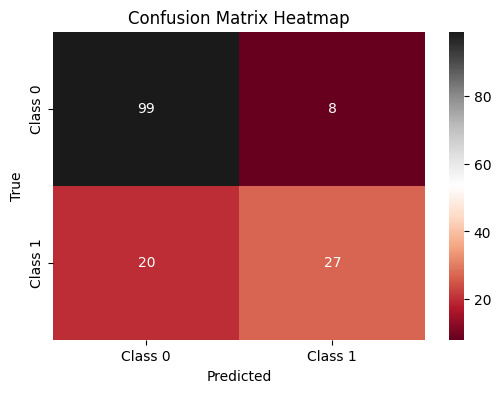

In [501]:
# Create the confusion matrix heatmap
cm = confusion_matrix(y_test, ypred_lr)
print(cm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdGy', xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# 2. KNN Classifier

In [502]:
# importing KNN library
from sklearn.neighbors import KNeighborsClassifier

# Building the KNN Classifier Model
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

# Generating prediction
ypred_knn= knn.predict(x_test)
print(ypred_knn)

# Evaluate the model - classification Report, Accuaracy Score
eval_model(knn, 'KNN Classifier', x_test, y_test, ypred_knn)


[1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]
--- KNN Classifier Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       107
           1       0.66      0.57      0.61        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154

Accuracy: 0.7792207792207793


[[93 14]
 [20 27]]


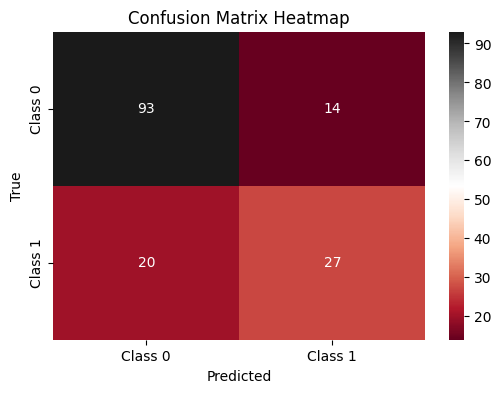

In [503]:
# Create the confusion matrix heatmap
cm = confusion_matrix(y_test, ypred_knn)
print(cm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdGy', xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# 3. Decision Tree Classifier

In [504]:
# importing Decision Tree library
from sklearn.tree import DecisionTreeClassifier

# Building the Decition Tree model
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(x_train,y_train)

# Generating the predictions
ypred_dt = dt.predict(x_test)
print(ypred_dt)

# Evaluate the model - classification Report, Accuaracy Score
eval_model(dt,'Decision Tree Classifier',x_test,y_test,ypred_dt)

[1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1
 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0]
--- Decision Tree Classifier Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       107
           1       0.61      0.74      0.67        47

    accuracy                           0.78       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.80      0.78      0.78       154

Accuracy: 0.7792207792207793


[[85 22]
 [12 35]]


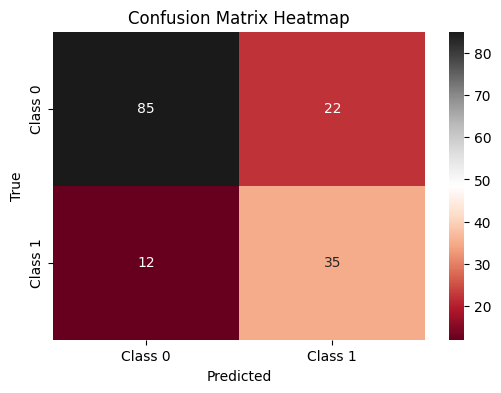

In [505]:
# Create the confusion matrix heatmap
cm = confusion_matrix(y_test, ypred_dt)
print(cm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdGy', xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# 4. Random Forest Classifier

In [506]:
# Import Random Forest library
from sklearn.ensemble import RandomForestClassifier

# Building the RF Model
rf = RandomForestClassifier(n_estimators=80)
rf.fit(x_train,y_train)

# Generating the predictions
ypred_rf = rf.predict(x_test)
print(ypred_rf)

# Evaluate the model - classification Report, Accuaracy Score
eval_model(rf,'Random Forest',x_test,y_test,ypred_rf)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0
 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]
--- Random Forest Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       107
           1       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154

Accuracy: 0.8051948051948052


[[94 13]
 [17 30]]


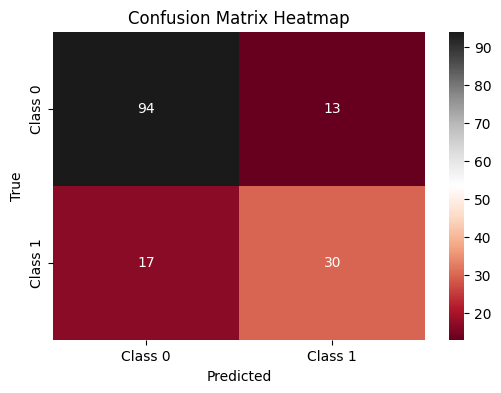

In [507]:
# Create the confusion matrix heatmap
cm = confusion_matrix(y_test, ypred_rf)
print(cm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdGy', xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# 5. Support Vector Machine

In [508]:
# Import SVM library
from sklearn.svm import SVC

# Building the SVM Model
svm = SVC()
svm.fit(x_train, y_train)

# Generating the predictions
ypred_svm = svm.predict(x_test)
print(ypred_svm)

# Evaluate the model - classification Report, Accuracy Score
eval_model(svm, 'SVM', x_test, y_test, ypred_svm)


[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0]
--- SVM Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       107
           1       0.72      0.55      0.63        47

    accuracy                           0.80       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154

Accuracy: 0.7987012987012987


[[97 10]
 [21 26]]


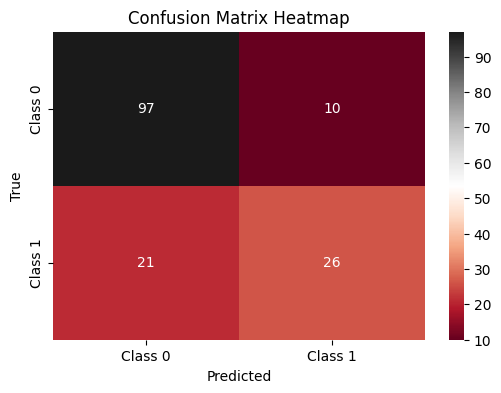

In [509]:
# Create the confusion matrix heatmap
cm = confusion_matrix(y_test, ypred_svm)
print(cm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdGy', xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# 6. Naive Bayes

In [510]:
# Import Naive Bayes library
from sklearn.naive_bayes import GaussianNB

# Building the Naive Bayes Model
nb = GaussianNB()
nb.fit(x_train, y_train)

# Generating the predictions
ypred_nb = nb.predict(x_test)
print(ypred_nb)

# Evaluate the model - classification Report, Accuracy Score
eval_model(nb, 'Naive Bayes', x_test, y_test, ypred_nb)

[1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
--- Naive Bayes Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

Accuracy: 0.7922077922077922


[[93 14]
 [18 29]]


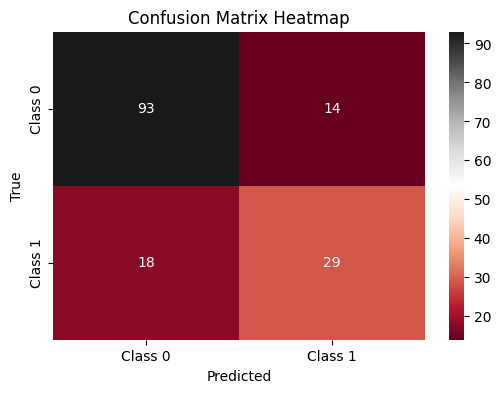

In [511]:
# Create the confusion matrix heatmap
cm = confusion_matrix(y_test, ypred_nb)
print(cm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdGy', xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Making a Dataframe for showing the best model

In [512]:
best_model = pd.DataFrame({
    'Model': ['Logistic Regression','KNN Classifier','Decision Tree Classifier' ,'Random Forest Classifier','SVM Classifier','Naive Bayes Classifier'],
    'Accuracy Score': [accuracy_score(y_test, ypred_lr),accuracy_score(y_test, ypred_knn),accuracy_score(y_test, ypred_dt),accuracy_score(y_test, ypred_rf),accuracy_score(y_test, ypred_svm),accuracy_score(y_test, ypred_nb)]})
best_model_df = best_model.sort_values(by='Accuracy Score', ascending=False)
best_model_df

Model  Accuracy Score
0       Logistic Regression        0.818182
3  Random Forest Classifier        0.805195
4            SVM Classifier        0.798701
5    Naive Bayes Classifier        0.792208
1            KNN Classifier        0.779221
2  Decision Tree Classifier        0.779221

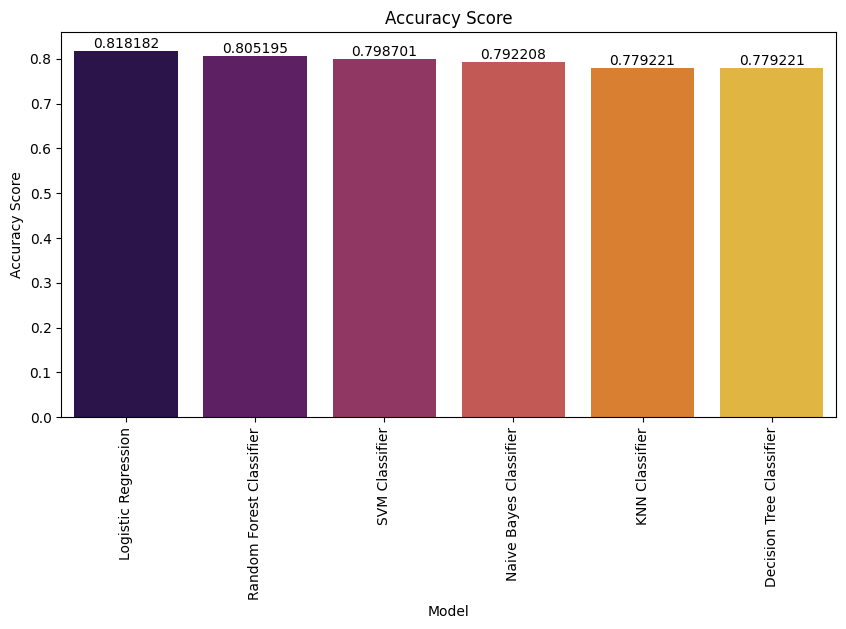

In [513]:
# Plotting the result
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Model',y='Accuracy Score',data=best_model_df,palette='inferno')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Accuracy Score')
plt.show()

### Best Model is Logistic Regression